In [35]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.neural_network import MLPClassifier
# from tensorflow.python.keras.layers import Dense
# from tensorflow.python.keras import Sequential
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
print(tf.__version__)

2.2.0-rc2


In [0]:
ERP = pd.read_csv('../final_schizo.csv')

In [37]:
ERP



Unnamed: 0  subject        Fz  ...       CP3       CP4   group
0                0        1  1.857458  ...  4.664762  3.425792       0
1                1        1  1.769692  ...  4.737277  3.272531       0
2                2        1  1.764793  ...  4.700508  3.171712       0
3                3        1  1.884980  ...  4.914420  3.385077       0
4                4        1  1.591516  ...  4.730303  3.335385       0
...            ...      ...       ...  ...       ...       ...     ...
248827      248827       81 -0.401267  ...  0.645761 -0.085649       1
248828      248828       81 -0.440294  ...  0.601938 -0.264824       1
248829      248829       81 -0.466162  ...  0.612470 -0.463196       1
248830      248830       81 -0.472620  ...  0.635287 -0.656748       1
248831      248831       81 -0.496193  ...  0.602888 -0.719264       1

[248832 rows x 12 columns]

The number of trials for the fit class is: 98304
The number of trials for the schizoprenic class is: 150528


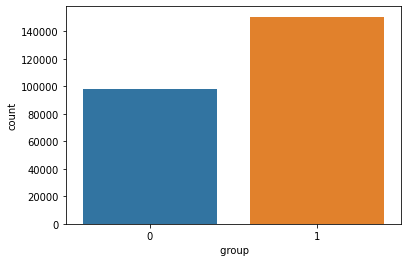

In [38]:
cols = ERP.columns
tgt = ERP[' group']
ax = sn.countplot(tgt,label="Count")
schizoprenic, fit = tgt.value_counts()
print('The number of trials for the fit class is:', fit)
print('The number of trials for the schizoprenic class is:', schizoprenic)


In [39]:
ERP.isnull().sum()


Unnamed: 0    0
subject       0
Fz            0
FCz           0
Cz            0
FC3           0
FC4           0
C3            0
C4            0
CP3           0
CP4           0
 group        0
dtype: int64

In [40]:
ERP.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248832 entries, 0 to 248831
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  248832 non-null  int64  
 1   subject     248832 non-null  int64  
 2   Fz          248832 non-null  float64
 3   FCz         248832 non-null  float64
 4   Cz          248832 non-null  float64
 5   FC3         248832 non-null  float64
 6   FC4         248832 non-null  float64
 7   C3          248832 non-null  float64
 8   C4          248832 non-null  float64
 9   CP3         248832 non-null  float64
 10  CP4         248832 non-null  float64
 11   group      248832 non-null  int64  
dtypes: float64(9), int64(3)
memory usage: 22.8 MB


In [41]:
ERP.describe()


Unnamed: 0        subject  ...            CP4          group
count  248832.000000  248832.000000  ...  248832.000000  248832.000000
mean   124415.500000      41.000000  ...       0.518643       0.604938
std     71831.755429      23.380951  ...       1.921775       0.488865
min         0.000000       1.000000  ...     -11.704520       0.000000
25%     62207.750000      21.000000  ...      -0.657320       0.000000
50%    124415.500000      41.000000  ...       0.408181       1.000000
75%    186623.250000      61.000000  ...       1.626807       1.000000
max    248831.000000      81.000000  ...      13.735362       1.000000

[8 rows x 12 columns]

In [42]:
X = ERP.iloc[:,1:11].values
X.shape

(248832, 10)

In [43]:
X[0]

array([1.        , 1.85745789, 2.66335158, 3.05191789, 1.78901053,
       1.96106526, 4.94990105, 2.28283579, 4.66476211, 3.42579158])

In [44]:
y = ERP.iloc[:,11].values
y

array([0, 0, 0, ..., 1, 1, 1])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [0]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
X_train[0]

array([-0.12930141,  0.10026226,  0.30178814, -0.20055721,  0.0491903 ,
        0.58512361, -0.29574723,  0.19043889, -1.00166643, -0.11185612])

In [0]:
classifier = keras.Sequential()


In [52]:
classifier.add(keras.layers.Dense(12, activation = 'relu', input_dim = 10))
classifier.add(keras.layers.Dense(8,  activation = 'relu'))
classifier.add(keras.layers.Dense(1 ,activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Fitting the ANN to the training set
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 50)



19907/19907 [==============================] - 27s 1ms/step - loss: 0.0438 - accuracy: 0.9923


In [53]:

# y_pred = classifier.predict(X_test, verbose =0)
# y_pred = (y_pred > 0.5)
yhat_probs = classifier.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = classifier.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Accuracy: 0.997046
Precision: 0.995274
Recall: 0.999867
F1 score: 0.997565
Cohens kappa: 0.993811
ROC AUC: 0.999903
[[19506   143]
 [    4 30114]]
